In [1]:
import os
import zipfile
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation, Conv2D, MaxPool2D, Reshape
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [2]:
archive_path = 'archive.zip'

extracted_path = 'extracted_data'

with zipfile.ZipFile(archive_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

train_data_dir = os.path.join(extracted_path, 'train')

test_data_dir = os.path.join(extracted_path, 'test')

In [3]:
# Функция для загрузки данных из папки
def load_data(data_dir):
    # Список эмоций
    emotions = ['happy', 'neutral', 'sad']
    
    # Инициализация списков для изображений и их меток
    images = []
    labels = []
    
    # Проход по каждой эмоции
    for idx, emotion in enumerate(emotions):
        # Путь к папке с изображениями для данной эмоции
        emotion_dir = os.path.join(data_dir, emotion)
        
        # Проход по каждому изображению в папке
        for img_name in os.listdir(emotion_dir):
            img_path = os.path.join(emotion_dir, img_name)
            # Загрузка изображения
            img = cv2.imread(img_path)
            # Преобразование изображения в оттенки серого
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            # Добавление изображения и его метки в списки
            images.append(img_gray)
            labels.append(idx)  # Используем индекс эмоции в списке эмоций как метку
    
    # Преобразование списков в массивы NumPy
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels

In [4]:
X_train, y_train = load_data(train_data_dir)


X_test, y_test = load_data(test_data_dir)

# Добавление размерности каналов
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [5]:
# Преобразование меток в формат one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Нормализация 
X_train = X_train / 255.0
X_test = X_test / 255.0

class_num = 3

In [6]:
print(X_train.shape[1:])

(48, 48, 1)


In [7]:
model = Sequential()
#block 1
model.add(Reshape((48,48,1),input_shape=X_train.shape[1:]))
model.add(Conv2D(32, (3, 3), padding = 'same', kernel_initializer='he_normal',activation = 'elu', input_shape = (48, 48, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding = 'same', kernel_initializer='he_normal',activation = 'elu'))
model.add(BatchNormalization())
model.add(MaxPool2D( (2,2), padding = 'same'))
model.add(Dropout(0.5))
#block 2
model.add(Conv2D(64, (3, 3), padding = 'same',kernel_initializer='he_normal', activation = 'elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding = 'same', kernel_initializer='he_normal',activation = 'elu'))
model.add(BatchNormalization())
model.add(MaxPool2D( (2,2), padding = 'same'))
model.add(Dropout(0.5))
#block 3
model.add(Conv2D(128, (3, 3), padding = 'same', kernel_initializer='he_normal', activation = 'elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding = 'same', kernel_initializer='he_normal', activation = 'elu'))
model.add(BatchNormalization())
model.add(MaxPool2D( (2,2), padding = 'same'))
model.add(Dropout(0.5))
#block 4
model.add(Conv2D(256, (3, 3), padding = 'same', kernel_initializer='he_normal', activation = 'elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding = 'same', kernel_initializer='he_normal', activation = 'elu'))
model.add(BatchNormalization())
model.add(MaxPool2D( (2,2), padding = 'same'))
model.add(Dropout(0.5))
#block 5
model.add(Conv2D(512, (3, 3), padding = 'same', kernel_initializer='he_normal', activation = 'elu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding = 'same', kernel_initializer='he_normal', activation = 'elu'))
model.add(BatchNormalization())
model.add(MaxPool2D( (2,2), padding = 'same'))
model.add(Dropout(0.5))
#Block6
model.add(Conv2D(1024, (3, 3), padding = 'same', kernel_initializer='he_normal', activation = 'elu'))
model.add(BatchNormalization())
model.add(Conv2D(1024, (3, 3), padding = 'same', kernel_initializer='he_normal', activation = 'elu'))
model.add(BatchNormalization())
model.add(MaxPool2D( (2,2), padding = 'same'))
model.add(Dropout(0.5))
#
model.add(Flatten())
model.add(Dense(512, kernel_initializer='he_normal', activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
#
model.add(Flatten())
model.add(Dense(256, kernel_initializer='he_normal', activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
#block7
model.add(Dense(128, kernel_initializer='he_normal', activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
#block8
model.add(Dense(64, kernel_initializer='he_normal', activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
#block8
model.add(Dense(3, activation = 'softmax'))

In [8]:
checkpoint = ModelCheckpoint('C:/Emotion_3_new.k',
                           monitor='val_loss',
                           mode='min',
                           save_best_only=True,
                           verbose=1)

In [9]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                            factor=0.2,
                            patience=4,
                            verbose=1,
                            min_lr=1e-7)

In [10]:
callbacks = [checkpoint,reduce_lr]

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# если sparce_categorical_crossentropy , callbacks то не работает

In [12]:
history = model.fit(X_train, y_train, batch_size=16, epochs = 30, validation_data = (X_test, y_test),callbacks=callbacks)

Epoch 1/30
1064/1064 [==============================] - ETA: 0s - loss: 1.2477 - accuracy: 0.3781
Epoch 1: val_loss improved from inf to 1.06250, saving model to C:/Emotion_3_new.k
INFO:tensorflow:Assets written to: C:/Emotion_3_new.k\assets


INFO:tensorflow:Assets written to: C:/Emotion_3_new.k\assets


1064/1064 [==============================] - 925s 865ms/step - loss: 1.2477 - accuracy: 0.3781 - val_loss: 1.0625 - val_accuracy: 0.4412 - lr: 0.0010
Epoch 2/30
1064/1064 [==============================] - ETA: 0s - loss: 1.0001 - accuracy: 0.4848
Epoch 2: val_loss improved from 1.06250 to 0.84380, saving model to C:/Emotion_3_new.k
INFO:tensorflow:Assets written to: C:/Emotion_3_new.k\assets


INFO:tensorflow:Assets written to: C:/Emotion_3_new.k\assets


1064/1064 [==============================] - 904s 849ms/step - loss: 1.0001 - accuracy: 0.4848 - val_loss: 0.8438 - val_accuracy: 0.5889 - lr: 0.0010
Epoch 3/30
1064/1064 [==============================] - ETA: 0s - loss: 0.8683 - accuracy: 0.5804
Epoch 3: val_loss improved from 0.84380 to 0.83217, saving model to C:/Emotion_3_new.k
INFO:tensorflow:Assets written to: C:/Emotion_3_new.k\assets


INFO:tensorflow:Assets written to: C:/Emotion_3_new.k\assets


1064/1064 [==============================] - 1019s 958ms/step - loss: 0.8683 - accuracy: 0.5804 - val_loss: 0.8322 - val_accuracy: 0.6098 - lr: 0.0010
Epoch 4/30
1064/1064 [==============================] - ETA: 0s - loss: 0.8073 - accuracy: 0.6254
Epoch 4: val_loss improved from 0.83217 to 0.69927, saving model to C:/Emotion_3_new.k
INFO:tensorflow:Assets written to: C:/Emotion_3_new.k\assets


INFO:tensorflow:Assets written to: C:/Emotion_3_new.k\assets


1064/1064 [==============================] - 1003s 942ms/step - loss: 0.8073 - accuracy: 0.6254 - val_loss: 0.6993 - val_accuracy: 0.6789 - lr: 0.0010
Epoch 5/30
1064/1064 [==============================] - ETA: 0s - loss: 0.7607 - accuracy: 0.6540
Epoch 5: val_loss improved from 0.69927 to 0.68130, saving model to C:/Emotion_3_new.k
INFO:tensorflow:Assets written to: C:/Emotion_3_new.k\assets


INFO:tensorflow:Assets written to: C:/Emotion_3_new.k\assets


1064/1064 [==============================] - 1107s 1s/step - loss: 0.7607 - accuracy: 0.6540 - val_loss: 0.6813 - val_accuracy: 0.6979 - lr: 0.0010
Epoch 6/30
1064/1064 [==============================] - ETA: 0s - loss: 0.7339 - accuracy: 0.6738
Epoch 6: val_loss improved from 0.68130 to 0.66746, saving model to C:/Emotion_3_new.k
INFO:tensorflow:Assets written to: C:/Emotion_3_new.k\assets


INFO:tensorflow:Assets written to: C:/Emotion_3_new.k\assets


1064/1064 [==============================] - 1027s 965ms/step - loss: 0.7339 - accuracy: 0.6738 - val_loss: 0.6675 - val_accuracy: 0.7019 - lr: 0.0010
Epoch 7/30
1064/1064 [==============================] - ETA: 0s - loss: 0.7124 - accuracy: 0.6882
Epoch 7: val_loss did not improve from 0.66746
1064/1064 [==============================] - 936s 879ms/step - loss: 0.7124 - accuracy: 0.6882 - val_loss: 0.6853 - val_accuracy: 0.6902 - lr: 0.0010
Epoch 8/30
1064/1064 [==============================] - ETA: 0s - loss: 0.6928 - accuracy: 0.7026
Epoch 8: val_loss improved from 0.66746 to 0.60291, saving model to C:/Emotion_3_new.k
INFO:tensorflow:Assets written to: C:/Emotion_3_new.k\assets


INFO:tensorflow:Assets written to: C:/Emotion_3_new.k\assets


1064/1064 [==============================] - 892s 838ms/step - loss: 0.6928 - accuracy: 0.7026 - val_loss: 0.6029 - val_accuracy: 0.7372 - lr: 0.0010
Epoch 9/30
1064/1064 [==============================] - ETA: 0s - loss: 0.6748 - accuracy: 0.7109
Epoch 9: val_loss did not improve from 0.60291
1064/1064 [==============================] - 883s 829ms/step - loss: 0.6748 - accuracy: 0.7109 - val_loss: 0.6414 - val_accuracy: 0.7198 - lr: 0.0010
Epoch 10/30
1064/1064 [==============================] - ETA: 0s - loss: 0.6514 - accuracy: 0.7198
Epoch 10: val_loss did not improve from 0.60291
1064/1064 [==============================] - 885s 832ms/step - loss: 0.6514 - accuracy: 0.7198 - val_loss: 0.6084 - val_accuracy: 0.7306 - lr: 0.0010
Epoch 11/30
1064/1064 [==============================] - ETA: 0s - loss: 0.6469 - accuracy: 0.7283
Epoch 11: val_loss improved from 0.60291 to 0.58123, saving model to C:/Emotion_3_new.k
INFO:tensorflow:Assets written to: C:/Emotion_3_new.k\assets


INFO:tensorflow:Assets written to: C:/Emotion_3_new.k\assets


1064/1064 [==============================] - 883s 830ms/step - loss: 0.6469 - accuracy: 0.7283 - val_loss: 0.5812 - val_accuracy: 0.7513 - lr: 0.0010
Epoch 12/30
1064/1064 [==============================] - ETA: 0s - loss: 0.6299 - accuracy: 0.7350
Epoch 12: val_loss did not improve from 0.58123
1064/1064 [==============================] - 881s 828ms/step - loss: 0.6299 - accuracy: 0.7350 - val_loss: 0.5936 - val_accuracy: 0.7313 - lr: 0.0010
Epoch 13/30
1064/1064 [==============================] - ETA: 0s - loss: 0.6131 - accuracy: 0.7408
Epoch 13: val_loss improved from 0.58123 to 0.57565, saving model to C:/Emotion_3_new.k
INFO:tensorflow:Assets written to: C:/Emotion_3_new.k\assets


INFO:tensorflow:Assets written to: C:/Emotion_3_new.k\assets


1064/1064 [==============================] - 884s 830ms/step - loss: 0.6131 - accuracy: 0.7408 - val_loss: 0.5757 - val_accuracy: 0.7393 - lr: 0.0010
Epoch 14/30
1064/1064 [==============================] - ETA: 0s - loss: 0.5972 - accuracy: 0.7503
Epoch 14: val_loss improved from 0.57565 to 0.56095, saving model to C:/Emotion_3_new.k
INFO:tensorflow:Assets written to: C:/Emotion_3_new.k\assets


INFO:tensorflow:Assets written to: C:/Emotion_3_new.k\assets


1064/1064 [==============================] - 884s 831ms/step - loss: 0.5972 - accuracy: 0.7503 - val_loss: 0.5610 - val_accuracy: 0.7616 - lr: 0.0010
Epoch 15/30
1064/1064 [==============================] - ETA: 0s - loss: 0.5878 - accuracy: 0.7530
Epoch 15: val_loss improved from 0.56095 to 0.56065, saving model to C:/Emotion_3_new.k
INFO:tensorflow:Assets written to: C:/Emotion_3_new.k\assets


INFO:tensorflow:Assets written to: C:/Emotion_3_new.k\assets


1064/1064 [==============================] - 883s 830ms/step - loss: 0.5878 - accuracy: 0.7530 - val_loss: 0.5607 - val_accuracy: 0.7591 - lr: 0.0010
Epoch 16/30
1064/1064 [==============================] - ETA: 0s - loss: 0.5887 - accuracy: 0.7604
Epoch 16: val_loss did not improve from 0.56065
1064/1064 [==============================] - 888s 835ms/step - loss: 0.5887 - accuracy: 0.7604 - val_loss: 0.5740 - val_accuracy: 0.7562 - lr: 0.0010
Epoch 17/30
1064/1064 [==============================] - ETA: 0s - loss: 0.5702 - accuracy: 0.7678
Epoch 17: val_loss did not improve from 0.56065
1064/1064 [==============================] - 880s 827ms/step - loss: 0.5702 - accuracy: 0.7678 - val_loss: 0.5663 - val_accuracy: 0.7616 - lr: 0.0010
Epoch 18/30
1064/1064 [==============================] - ETA: 0s - loss: 0.5589 - accuracy: 0.7685
Epoch 18: val_loss did not improve from 0.56065
1064/1064 [==============================] - 880s 827ms/step - loss: 0.5589 - accuracy: 0.7685 - val_loss: 0.

INFO:tensorflow:Assets written to: C:/Emotion_3_new.k\assets


1064/1064 [==============================] - 890s 837ms/step - loss: 0.5130 - accuracy: 0.7926 - val_loss: 0.5544 - val_accuracy: 0.7628 - lr: 2.0000e-04
Epoch 21/30
1064/1064 [==============================] - ETA: 0s - loss: 0.4928 - accuracy: 0.8036
Epoch 21: val_loss improved from 0.55439 to 0.55029, saving model to C:/Emotion_3_new.k
INFO:tensorflow:Assets written to: C:/Emotion_3_new.k\assets


INFO:tensorflow:Assets written to: C:/Emotion_3_new.k\assets


1064/1064 [==============================] - 876s 823ms/step - loss: 0.4928 - accuracy: 0.8036 - val_loss: 0.5503 - val_accuracy: 0.7621 - lr: 2.0000e-04
Epoch 22/30
1064/1064 [==============================] - ETA: 0s - loss: 0.4913 - accuracy: 0.8055
Epoch 22: val_loss improved from 0.55029 to 0.54936, saving model to C:/Emotion_3_new.k
INFO:tensorflow:Assets written to: C:/Emotion_3_new.k\assets


INFO:tensorflow:Assets written to: C:/Emotion_3_new.k\assets


1064/1064 [==============================] - 880s 827ms/step - loss: 0.4913 - accuracy: 0.8055 - val_loss: 0.5494 - val_accuracy: 0.7647 - lr: 2.0000e-04
Epoch 23/30
1064/1064 [==============================] - ETA: 0s - loss: 0.4758 - accuracy: 0.8127
Epoch 23: val_loss did not improve from 0.54936
1064/1064 [==============================] - 875s 822ms/step - loss: 0.4758 - accuracy: 0.8127 - val_loss: 0.5530 - val_accuracy: 0.7661 - lr: 2.0000e-04
Epoch 24/30
1064/1064 [==============================] - ETA: 0s - loss: 0.4711 - accuracy: 0.8150
Epoch 24: val_loss did not improve from 0.54936
1064/1064 [==============================] - 871s 819ms/step - loss: 0.4711 - accuracy: 0.8150 - val_loss: 0.5581 - val_accuracy: 0.7602 - lr: 2.0000e-04
Epoch 25/30
1064/1064 [==============================] - ETA: 0s - loss: 0.4660 - accuracy: 0.8195
Epoch 25: val_loss did not improve from 0.54936
1064/1064 [==============================] - 870s 818ms/step - loss: 0.4660 - accuracy: 0.8195 - 

In [13]:
model.save('last_epoch_new.k')

INFO:tensorflow:Assets written to: last_epoch_new.k\assets


INFO:tensorflow:Assets written to: last_epoch_new.k\assets


In [14]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 77.20%


In [15]:
import matplotlib.pyplot as plt

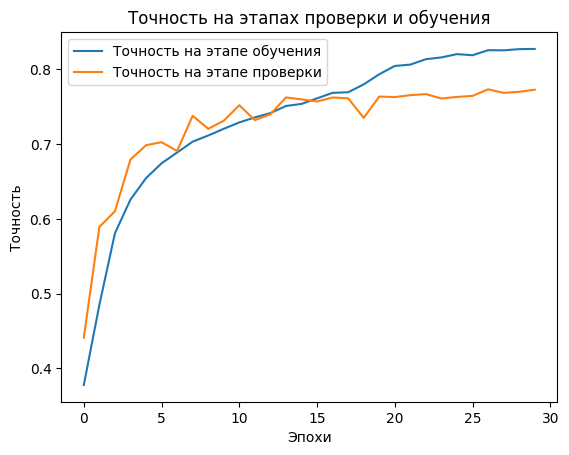

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность на этапах проверки и обучения')
plt.ylabel('Точность')
plt.xlabel('Эпохи')
plt.legend(['Точность на этапе обучения', 'Точность на этапе проверки'], loc='upper left')
plt.show()

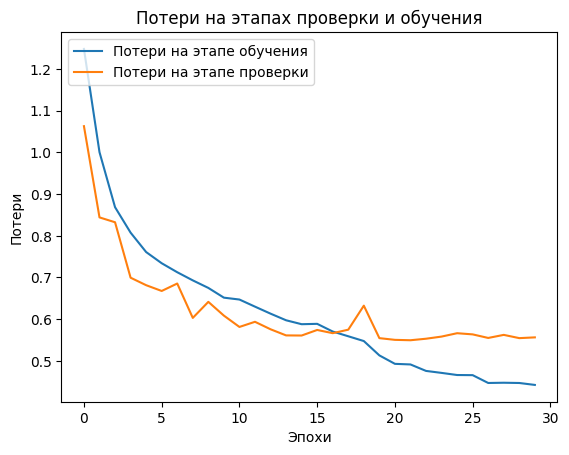

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери на этапах проверки и обучения')
plt.ylabel('Потери')
plt.xlabel('Эпохи')
plt.legend(['Потери на этапе обучения', 'Потери на этапе проверки'], loc='upper left')
plt.show()